In [1]:
from gw_eccentricity import load_waveform, load_data, get_available_methods, measure_eccentricity
from gw_eccentricity.load_data import get_available_waveform_origins, get_load_waveform_defaults, get_load_waveform_docs
import matplotlib.pyplot as plt
from gw_eccentricity.plot_settings import use_fancy_plotsettings, labelsDict
import numpy as np
from tqdm import tqdm
from lal import MSUN_SI, MTSUN_SI, G_SI, PC_SI, C_SI, PI
from pycbc import waveform
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
%load_ext autoreload
%autoreload 2

/home/pratul/anaconda3/envs/pycbc/lib/python3.9/site-packages/gw_eccentricity/load_data.py:6: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


lal.MSUN_SI != Msun
setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work


In [2]:
get_available_waveform_origins()

['LAL', 'SXSCatalog', 'SXSCatalog_old', 'LVCNR', 'LVCNR_hack', 'EOB', 'EMRI']

In [3]:
origin = "SXSCatalog_old"
get_load_waveform_defaults(origin)

#export LAL_DATA_PATH='home/pratul/Downloads/'  #first run this in command line then run jupyter notebook

{'data_dir': None,
 'metadata_path': None,
 'deltaTOverM': 0.1,
 'include_zero_ecc': False,
 'include_params_dict': False,
 'zero_ecc_approximant': 'IMRPhenomT',
 'num_orbits_to_remove_as_junk': 2,
 'mode_array': [(2, 2)],
 'extrap_order': 2}

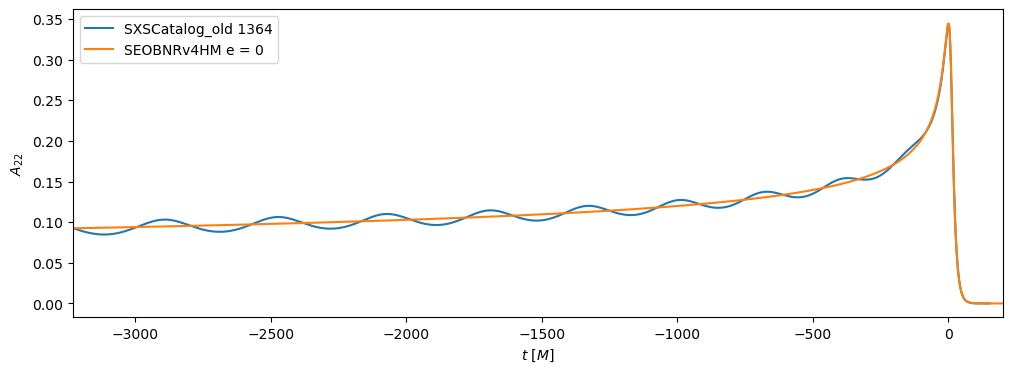

In [11]:
kwargs = {"data_dir": '/home/pratul/Downloads/Project/NR_data/1364',
         "include_zero_ecc":True,
         "zero_ecc_approximant": "SEOBNRv4HM"}

dataDict = load_waveform(origin, **kwargs)
plt.figure(figsize=(12,4))
plt.plot(dataDict["t"], np.abs(dataDict["hlm"][(2,2)]),label=origin+' '+str(1364))
plt.plot(dataDict["t_zeroecc"], np.abs(dataDict["hlm_zeroecc"][(2,2)]),label=kwargs["zero_ecc_approximant"] + " e = 0")
plt.xlim(dataDict["t"][0],200)
plt.xlabel(labelsDict["t_dimless"])
plt.ylabel(labelsDict["amp22"])
plt.legend(loc="upper left")

In [10]:
# Measuring ecc at a ref time
tref_in = -1000
method = "ResidualAmplitude"
return_dict = measure_eccentricity(tref_in=tref_in,method=method,dataDict=dataDict)
    
tref_out = return_dict["tref_out"]
eccentricity = return_dict["eccentricity"]
mean_anomaly = return_dict["mean_anomaly"]
gwecc_object = return_dict["gwecc_object"]
print(f"method = {method:20s} eccentricity = {eccentricity:.6f}, mean_anomaly={mean_anomaly:.6f}")

method = ResidualAmplitude    eccentricity = 0.043787, mean_anomaly=6.189457


(<Figure size 1200x2800 with 7 Axes>,
 array([<AxesSubplot:ylabel='$e_{\\mathrm{gw}}$'>,
        <AxesSubplot:ylabel='$l_{\\mathrm{gw}}$ [rad]'>,
        <AxesSubplot:ylabel='$\\omega_{22}$'>,
        <AxesSubplot:title={'center':'Data being used for finding the extrema.'}, ylabel='$A_{22}$'>,
        <AxesSubplot:ylabel='$de/dt$'>,
        <AxesSubplot:title={'center':'Ratio of phase difference between consecutive extrema'}, ylabel='$\\Delta \\Phi_{orb}[i] / \\Delta \\Phi_{orb}[i-1]$'>,
        <AxesSubplot:xlabel='$t$', ylabel='Averaged frequency'>],
       dtype=object))

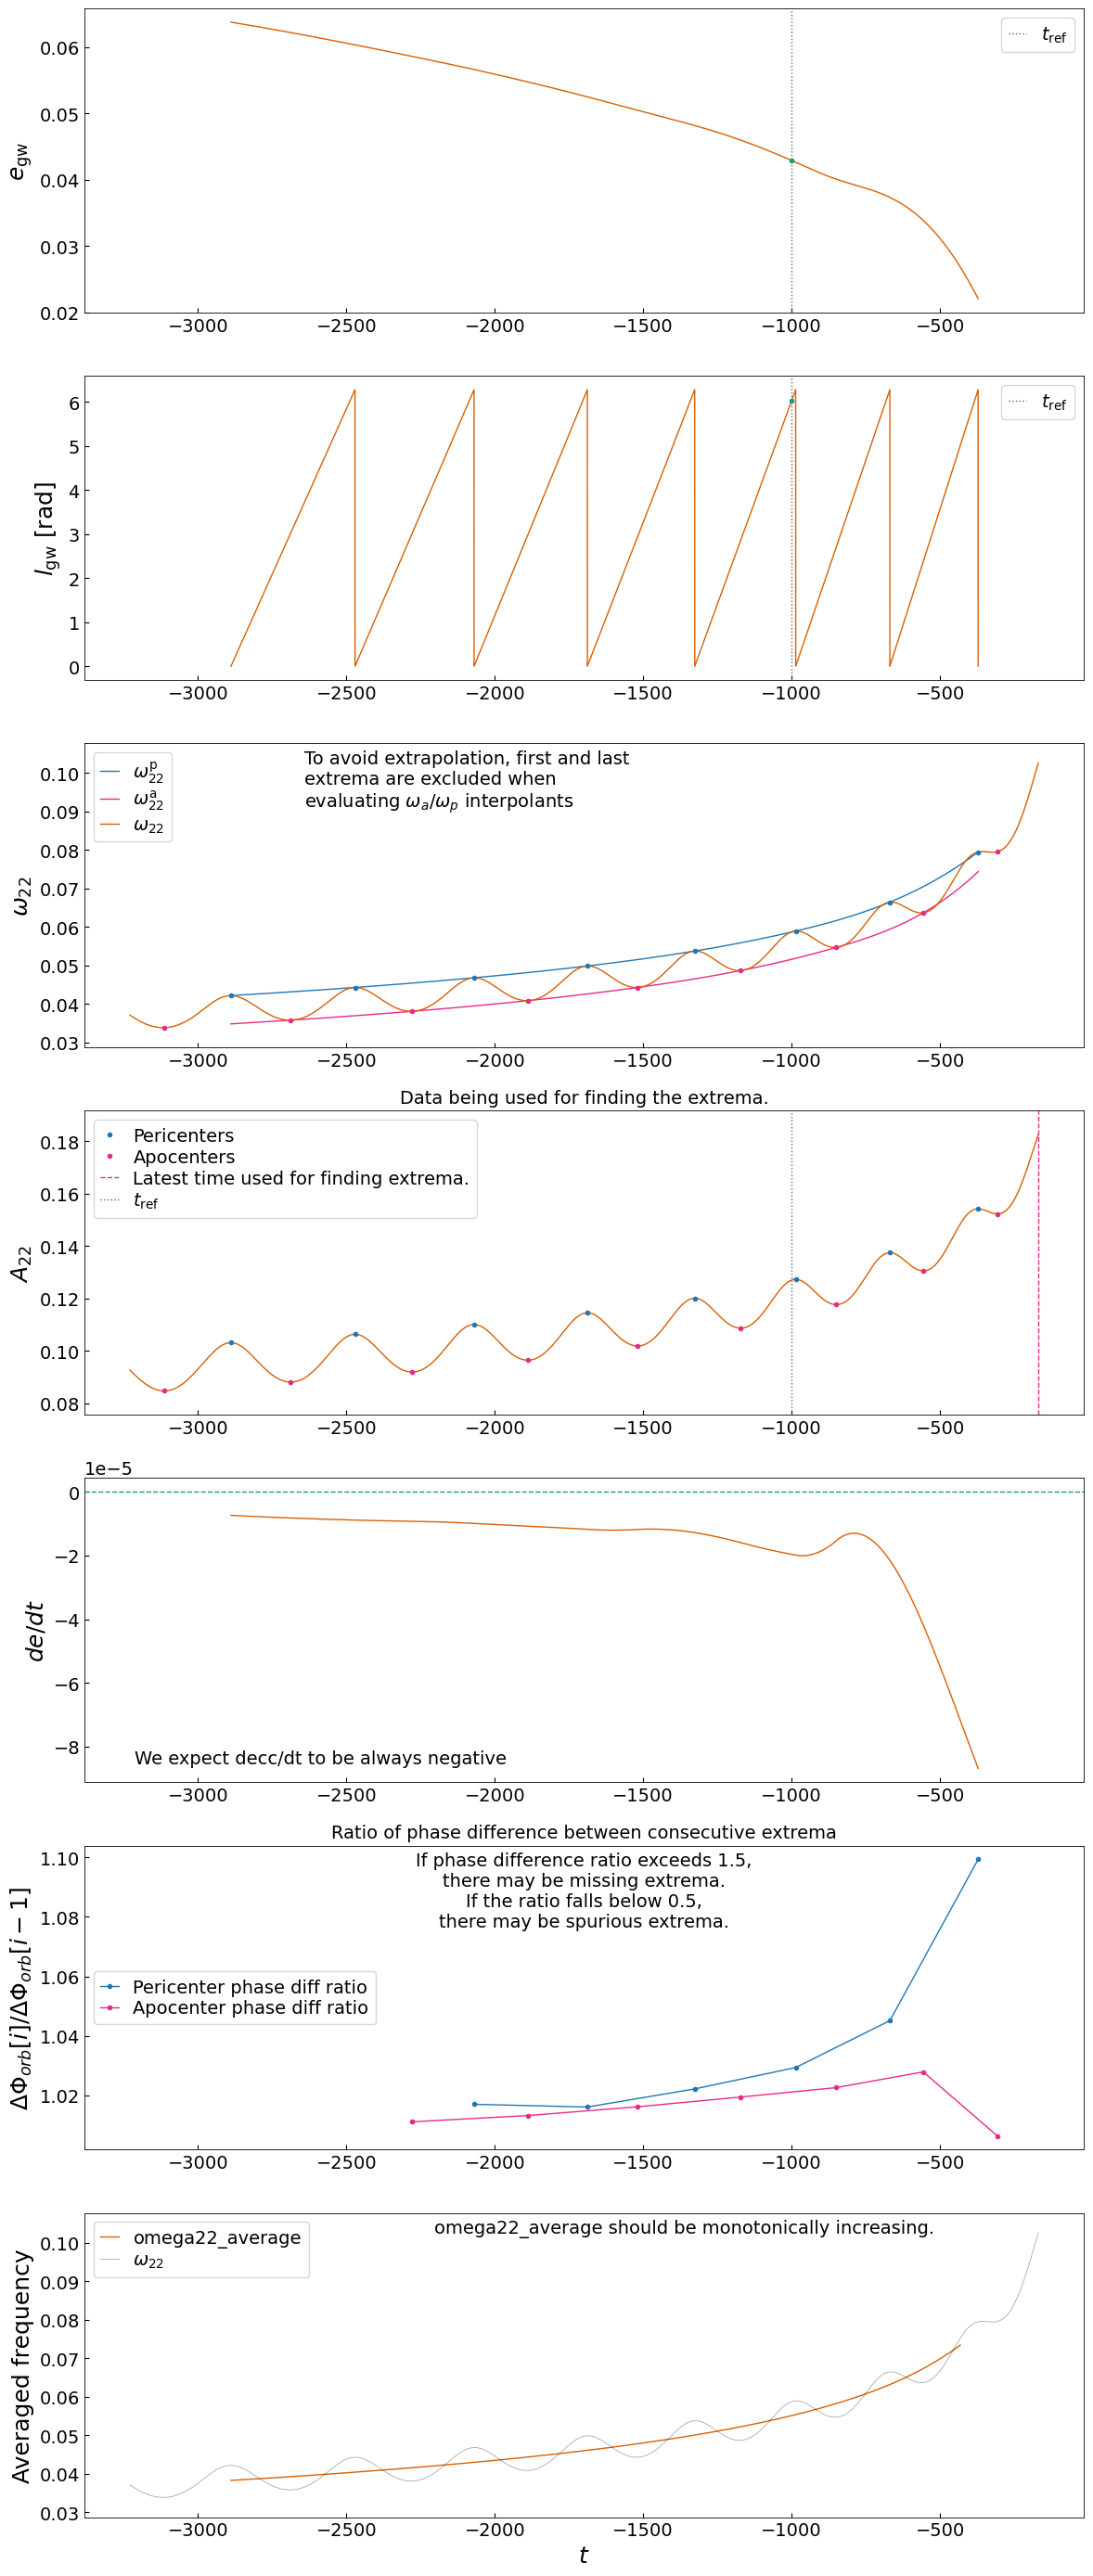

In [6]:
gwecc_object.make_diagnostic_plots()